# TITANIC PROJECT WITH KERAS AND DEEP LEARNING CLASSIFICATION

### Data Dictionary

* PassengerId: Unique identifier for each passenger.<br>
* Survived: Indicates whether the passenger survived or not - 0 (did not survive) or 1 (survived).<br>
* Pclass: Passenger class. 1 = 1st Class, 2 = 2nd Class, 3 = 3rd Class.<br>
* Name: Full name of the passenger.<br>
* Sex: Passenger's gender, "male" or "female".<br>
* Age: Passenger's age.<br>
* SibSp: Number of siblings/spouses the passenger had aboard the ship.<br>
* Parch: Number of parents/children the passenger had aboard the ship.<br>
* Ticket: Passenger's ticket number.<br>
* Fare: Passenger's ticket fare.<br>
* Cabin: Passenger's cabin number.<br>
* Embarked: Port where the passenger embarked the ship, "S" (Southampton), "C" (Cherbourg) or "Q" (Queenstown).

### Import Packages and Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import numpy as np

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dropout, LeakyReLU
from sklearn.preprocessing import normalize, scale
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [15]:
df_train = pd.read_csv("ttrain.csv")
df_test = pd.read_csv("ttest.csv")

### EDA 

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [16]:
df = pd.concat([df_train, df_test], ignore_index=True)

In [9]:
df.shape

(1309, 12)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [22]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [21]:
df[df["Fare"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [23]:
df.Fare.fillna(df[ (df['Embarked'] == 'S') & (df['Pclass'] == 3) ]['Fare'].mean(), inplace=True)

In [24]:
df[df["PassengerId"]==1044]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,14.435422,NaN,S


In [33]:
df.Cabin.value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64

In [34]:
df.drop('Cabin', axis=1, inplace=True)

In [35]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

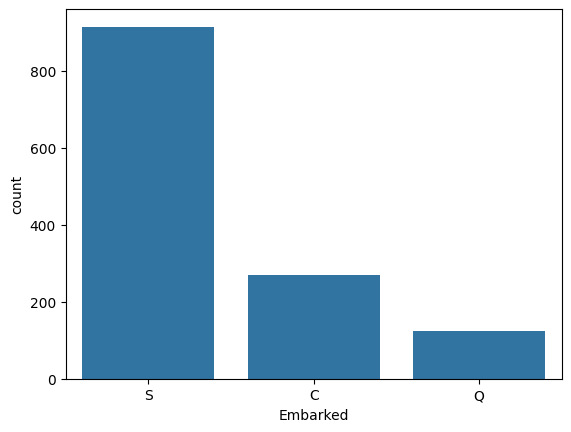

In [25]:
sns.countplot(x=df.Embarked);

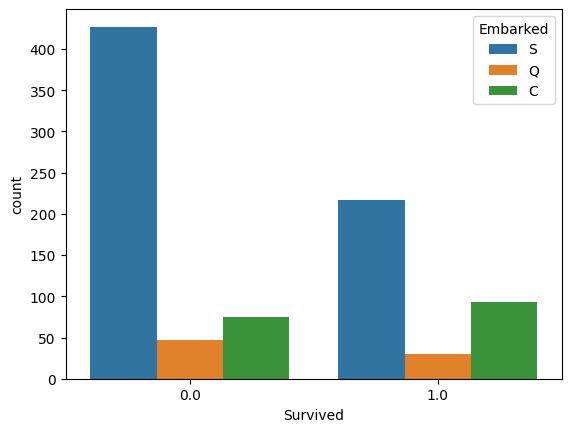

In [26]:
sns.countplot(x= 'Survived', hue = 'Embarked', data=df);

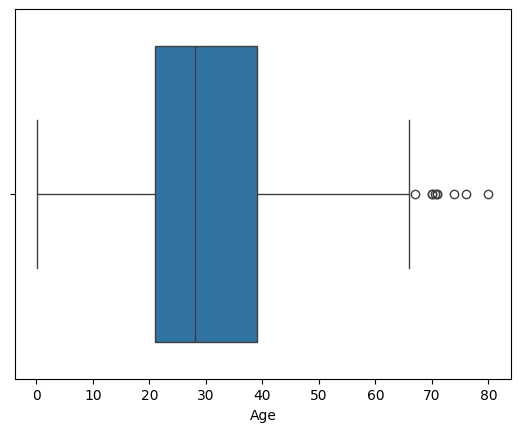

In [27]:
sns.boxplot(x = df["Age"]);

In [28]:
df["Survived"].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [36]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=True)

In [37]:
df.Title.value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [38]:
df.Title = df.Title.replace(['Ms', 'Mile','Mlle'], 'Miss')

In [39]:
df.Title = df.Title.replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')

In [40]:
df.Title = df.Title.replace(['Dr', 'Major','Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

In [41]:
df.Title.value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [42]:
df= df.drop(['Name'], axis=1)

In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [44]:
df.groupby('Title')['Age'].median(), df.groupby('Title')['Age'].mean()

(Title
 Master     4.0
 Miss      22.0
 Mr        30.0
 Mrs       35.5
 Name: Age, dtype: float64,
 Title
 Master     5.482642
 Miss      21.824366
 Mr        32.811056
 Mrs       36.971264
 Name: Age, dtype: float64)

In [45]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [46]:
df.Age.mean()

29.960546124336066

In [47]:
df[ df['Title'] == 'Master' ]['Age'].mean()

5.482641509433963

In [48]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Title            0
dtype: int64

In [49]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025285,-0.055224,0.008942,0.031127
Survived,-0.005007,1.000000,-0.338481,-0.089368,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.374442,0.060832,0.018322,-0.558684
Age,0.025285,-0.089368,-0.374442,1.000000,-0.221369,-0.139917,0.167343
SibSp,-0.055224,-0.035322,0.060832,-0.221369,1.000000,0.373587,0.160350
Parch,0.008942,0.081629,0.018322,-0.139917,0.373587,1.000000,0.221635
Fare,0.031127,0.257307,-0.558684,0.167343,0.160350,0.221635,1.000000


In [53]:
df.Embarked.fillna('S', inplace=True)

In [50]:
del df['Ticket']

In [51]:
del df['PassengerId']

In [54]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [55]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
df['Class*Fare'] = df['Pclass'] * df['Fare']

In [56]:
df = pd.get_dummies(df, drop_first=True)

In [57]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Class*Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.000000,1,0,7.2500,2,0,21.7500,True,False,True,False,True,False
1,1.0,1,38.000000,1,0,71.2833,2,0,71.2833,False,False,False,False,False,True
2,1.0,3,26.000000,0,0,7.9250,1,1,23.7750,False,False,True,True,False,False
3,1.0,1,35.000000,1,0,53.1000,2,0,53.1000,False,False,True,False,False,True
4,0.0,3,35.000000,0,0,8.0500,1,1,24.1500,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,32.811056,0,0,8.0500,1,1,24.1500,True,False,True,False,True,False
1305,NaN,1,39.000000,0,0,108.9000,1,1,108.9000,False,False,False,False,False,True
1306,NaN,3,38.500000,0,0,7.2500,1,1,21.7500,True,False,True,False,True,False
1307,NaN,3,32.811056,0,0,8.0500,1,1,24.1500,True,False,True,False,True,False


In [58]:
train  = df[df.Survived.notnull()]
test = df[df.Survived.isnull()].drop('Survived', axis=1)

x = train.drop(['Survived'], axis=1)
y = train[['Survived']]

In [59]:
smote = SMOTE(random_state = 42)
x_sm, y_sm = smote.fit_resample(x, y)

In [60]:
x.shape, y.shape, x_sm.shape, y_sm.shape

((891, 14), (891, 1), (1098, 14), (1098, 1))

### Modelling

In [61]:
model = Sequential()
model.add(Dense(32,activation= "relu"))
model.add(Dense(16,activation= "relu"))
model.add(Dense(8,activation= "relu"))
model.add(Dense(1,activation= "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(x_sm, y_sm, epochs=250, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5116 - loss: 0.8647 - val_accuracy: 0.4773 - val_loss: 0.7900
Epoch 2/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.6435 - loss: 0.6254 - val_accuracy: 0.3727 - val_loss: 0.7841
Epoch 3/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6808 - loss: 0.5775 - val_accuracy: 0.5182 - val_loss: 0.7285
Epoch 4/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7090 - loss: 0.5748 - val_accuracy: 0.5273 - val_loss: 0.7475
Epoch 5/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.6933 - loss: 0.5549 - val_accuracy: 0.6864 - val_loss: 0.5127
Epoch 6/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.7033 - loss: 0.5629 - val_accuracy: 0.5727 - val_loss: 0.6728
Epoch 7/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.7232 - loss: 0.5284 - val_accuracy: 0.4409 - val_loss: 0.8568
Epoch 8/250
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7126 - loss: 0.5269 - val_accuracy

In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,461 (13.52 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,308 (9.02 KB)

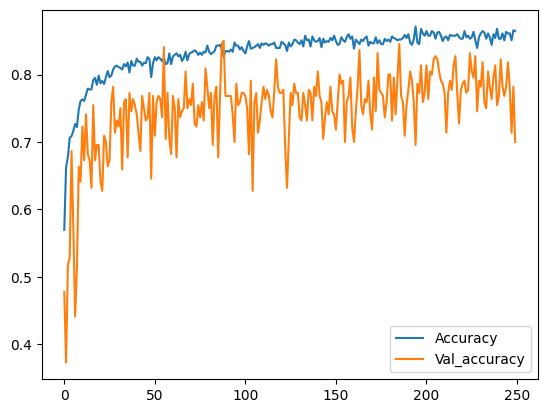

In [63]:
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Val_accuracy")
plt.legend();

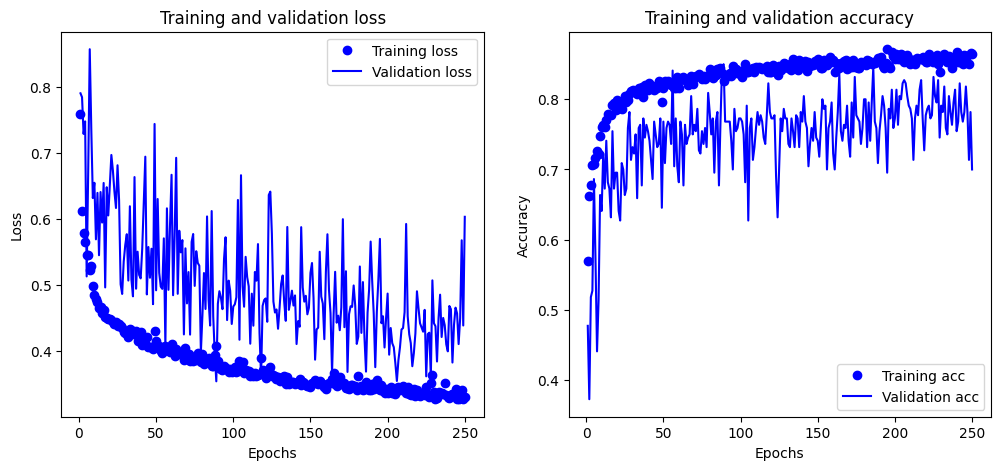

In [64]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

# Loss grafiği
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show();

In [65]:
pred = model.predict(test).flatten()
pred = (pred > 0.5).astype("int64")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [66]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
result = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': pred})
result['Survived'] = result['Survived'].astype('int64')

In [69]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [70]:
result.to_csv('titanic_dl.csv', index=False)